In [1]:
!pip install nltk
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import os
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     ./nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     ./nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [5]:
def preprocess_and_tokenize(review):
    review = re.sub(r'[^\w\s]', '', review.lower())
    tokens = nltk.word_tokenize(review)
    normalized_tokens = [stemmer.stem(token) for token in tokens]
    filtered_tokens = [token for token in normalized_tokens if token not in stop_words and not token.isdigit()]
    return filtered_tokens

In [6]:
root = os.getcwd()
dataset = root + "/AmazonData.csv"

In [7]:
root

'./fair_taucc/datasets/amazon'

In [8]:
df = pd.read_csv(dataset)

In [9]:
df.head(10)

,RevId,firstname,helpfulVotes,totalVotes,RevText,rating,RevTitle,Unix.RevTime,month,year,Category,gender,genderprobability,female,male,helpfulnessT,reviewwords,titlewords
0,AIWIEN0F9YDRZ,amy,0,1,MY son works on the railroad and these gloves ...,5,good looking and functional,1389398400,1,2014,Home and Tools,female,0.99,1,0,0.0,30,4
1,A3PNHWIMESAO1O,ann,0,1,I just decided to go with the Moen DN6718ORB D...,3,this product was fine,1389139200,1,2014,Home and Tools,female,0.99,1,0,0.0,23,4
2,AU2FLCLW8W04P,liz,0,1,Fit well into our sparkling grape juice bottle...,5,Fit Well,1389052800,1,2014,Home and Tools,female,1.00,1,0,0.0,42,2
3,A1C6HTWGSMORUB,beth,0,6,I thought that my teenagers would like these k...,1,"The Product was good, but customer service not...",1389398400,1,2014,Home and Tools,female,1.00,1,0,0.0,193,10
4,AZ7OW7KDTEHCG,judy,0,1,"with this thing , It might be good for getting...",1,I ruined my sinks,1389744000,1,2014,Home and Tools,female,1.00,1,0,0.0,23,4
5,A326T7B8O4EFS3,lara,0,2,"as a steel ruler it's ok, but it is not what I...",3,I was looking for a slide rule,1389052800,1,2014,Home and Tools,female,1.00,1,0,0.0,28,7
6,A2WVI8BDWVX58J,lila,0,1,My husband was very happy with the quality of ...,5,Bosch drill bits,1388707200,1,2014,Home and Tools,female,0.99,1,0,0.0,27,3
7,A1TDJJMU3VOHPY,lisa,0,1,not what I thought I was getting.wanted meat g...,3,so-so,1390435200,1,2014,Home and Tools,female,1.00,1,0,0.0,20,1
8,A3AEQWXRLJ4D5E,lisa,0,1,My husband has had one for years and my son in...,5,Self igniting torch,1390694400,1,2014,Home and Tools,female,1.00,1,0,0.0,119,3
9,A2G2S9E76XL3Y9,mary,0,1,The attachment for scanning negative film is v...,1,Unsatisfied,1390521600,1,2014,Home and Tools,female,1.00,1,0,0.0,29,1


In [10]:
df.keys()

Index(['RevId', 'firstname', 'helpfulVotes', 'totalVotes', 'RevText', 'rating',
       'RevTitle', 'Unix.RevTime', 'month', 'year', 'Category', 'gender',
       'genderprobability', 'female', 'male', 'helpfulnessT', 'reviewwords',
       'titlewords'],
      dtype='object')

In [11]:
columns = ["firstname", "RevText", "RevTitle", "rating", "Category", "gender"]

In [12]:
df = df[columns]

In [13]:
df["text_tokens"] = df["RevText"].apply(preprocess_and_tokenize)
df["title_tokens"] = df["RevTitle"].apply(preprocess_and_tokenize)

In [14]:
df["tokens"] = df["text_tokens"] + df["title_tokens"]
df["tokens"]

0       [son, work, railroad, glove, perfect, job, lik...
1       [decid, go, moen, dn6718orb, danburi, 18inch, ...
2       [fit, well, sparkl, grape, juic, bottl, use, r...
3       [thought, teenag, would, like, kit, uniqu, chr...
4       [thing, might, good, get, rust, car, someth, r...
                              ...                        
3257    [slather, mayb, recommend, onli, week, befor, ...
3258    [use, mask, water, appl, cider, vinegar, defin...
3259    [made, hair, grow, stop, break, realli, thin, ...
3260    [wrinkl, even, seem, wors, revitoli, quit, use...
3261    [hair, look, like, cotton, curl, pattern, ever...
Name: tokens, Length: 3262, dtype: object

## Statistiche

### 1. Lunghezza media delle review per genere e categoria (numero di parole usate nella review, anche duplicati)

### 2. Numero medio di parole uniche diverse per maschi e femmine (numero parole uniche / lunghezza review)


In [20]:
STATS = 1

In [21]:
def create_stats():

    stats_dict = {
        "male": {"Home and Tools": [], "Beauty": []},
        "female": {"Home and Tools": [], "Beauty": []}
    }

    for idx, row in enumerate(df["tokens"]):
        review_length = len(row)
        gender = df["gender"][idx]
        category = df["Category"][idx]

        if STATS == 1:
            stats_dict[gender][category].append(review_length)

        elif STATS == 2:
            unique_words_len = np.unique(row).shape[0]
            stats_dict[gender][category].append(review_length/unique_words_len)

        else:
            raise ValueError("STATS = 1 or STATS = 2")
            
    mean_length = {}

    for gender in stats_dict:
        mean_length[gender] = {}
        for cat in stats_dict[gender]:
            mean_length[gender][cat] = np.round(np.mean(stats_dict[gender][cat]),2)

    return mean_length

In [22]:
stats_dict = create_stats()
stats_dict

{'male': {'Home and Tools': 38.4, 'Beauty': 34.37},
 'female': {'Home and Tools': 31.31, 'Beauty': 33.05}}

In [23]:
def plot_stats():
    
    categories = np.unique(df["Category"])

    counts = {
        "Male": [stats_dict["male"][categories[0]], stats_dict["male"][categories[1]]],
        "Female": [stats_dict["female"][categories[0]], stats_dict["female"][categories[1]]]
    }

    x = np.arange(len(categories))  # the label locations
    width = 0.40  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in counts.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('mean')

    if STATS == 1:
        ax.set_title('Avg length of reviews by Gender and Category')
    elif STATS == 2:
        ax.set_title('Avg number of unique words by Gender and Category')

    ax.set_xticks(x + width/2, categories)
    ax.legend(loc='upper right')
    plt.show()

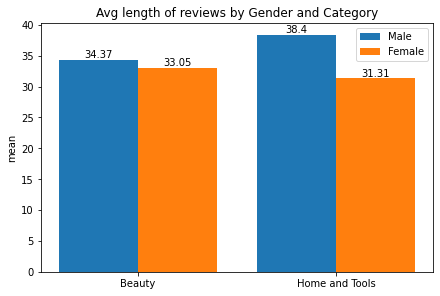

In [24]:
plot_stats()

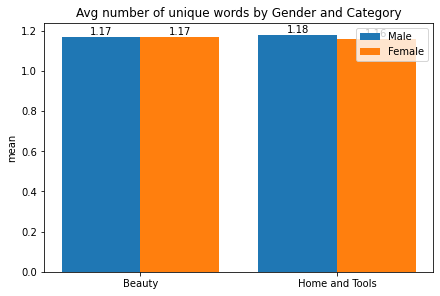

In [19]:
plot_stats()

### Words by User

In [ ]:
# tokens grouped by users and gender
grouped_df = df[["firstname", "gender", "tokens"]].groupby(["firstname", "gender"])

In [ ]:
new_data = {
    "firstname": [],
    "gender": [],
    "tokens": []
}

word_count_dict = dict()

words = set()

In [ ]:
for group in grouped_df:
    firstname = group[0][0]
    gender = group[0][1]
    new_data["firstname"].append(firstname)
    new_data["gender"].append(gender)
    lists_to_union = group[1]["tokens"].reset_index(drop=True)
    word_array = [item for sublist in lists_to_union for item in sublist]
    word_npy = np.array(word_array)
    unique_words, word_counts = np.unique(word_npy, return_counts=True)
    word_count_dict[firstname] = dict(zip(unique_words, word_counts))
    words.update(unique_words)
    # word_count_dict.update(dict(zip(unique_words, word_counts)))
    new_data["tokens"].append(word_array)

In [ ]:
word_count_dict

In [ ]:
new_df = pd.DataFrame(new_data)
display(new_df)

In [ ]:
new_df.to_csv(root + "\\tokens.csv", index=False)

In [ ]:
words_list = list(words)
words_list = np.sort(words_list)

In [ ]:
np.save(root + "\\words.npy", words_list)
np.save(root + "\\dict.npy", word_count_dict)

In [ ]:
words_list

In [ ]:
users = new_df["firstname"].tolist()
np.save(root + "\\users.npy", users)

gender = new_df["gender"].tolist()
gender = np.array(gender)
mapping = {"male": 0, "female": 1}
gender = np.vectorize(mapping.get)(gender)
print(gender)
np.save(root + "\\gender.npy", gender)

In [ ]:
num_users = len(users)
num_words = len(words_list)

users_id = np.arange(num_users)
males_id = np.where(gender[users_id] == 0)[0]
females_id = np.where(gender[users_id] == 1)[0]

In [ ]:
users = np.array(users)

In [ ]:
males = users[males_id]
females = users[females_id]

In [ ]:
print(f"Number of users: {num_users}")
print(f"- Males: {len(males)}")
print(f"- Females: {len(females)}")
print(f"- Total: {len(gender)}")
print()
print(f"Number of words: {num_words}")

In [ ]:
matrix = np.zeros((num_users, num_words), dtype=int)

for user in word_count_dict:
    user_id = np.where(users == user)[0][0]
    user_dict = word_count_dict[user]
    user_words = list(user_dict.keys())
    user_values = list(user_dict.values())
    word_ids = list(np.where(np.isin(words_list, user_words))[0])
    if list(words_list[word_ids]) == user_words:
        matrix[user_id, word_ids] = user_values
    else:
        raise ValueError("Matching error index-value")

In [ ]:
non_zero_indices = np.nonzero(matrix)
non_zero_values = matrix[non_zero_indices]
print("Non-zero values:")
print(non_zero_values)
print("Indices:")
print(non_zero_indices)

In [ ]:
np.save(root + "\\amazon.npy", matrix)

#### Stats about words used by Males and Females

In [ ]:
male_words = {}
female_words = {}

for male in males:
    for word, freq in word_count_dict[male].items():
        male_words[word] = male_words.get(word, 0) + freq

for female in females:
    for word, freq in word_count_dict[female].items():
        female_words[word] = female_words.get(word, 0) + freq

In [ ]:
common_words = set(male_words.keys()).intersection(set(female_words.keys()))
common_words = list(common_words)

In [ ]:
male_words_no_common = []
female_words_no_common = []

for key, value in male_words.items():
    if key not in common_words:
        male_words_no_common.append(key)

for key, value in female_words.items():
    if key not in common_words:
        # female_words_no_common[key] = value
        female_words_no_common.append(key)

In [ ]:
print(f"Num words used by men: {len(male_words_no_common)}")
print(f"Num words used by women: {len(female_words_no_common)}")
print(f"Num common words: {len(common_words)}")


In [ ]:
# 0: words used by men
# 1: words used by women
# 2: words used by both men and women
preferred_words = np.zeros_like(words_list, dtype=int)
preferred_words.shape

In [ ]:
preferred_words

In [ ]:
word_ids_F = np.where(np.isin(words_list, female_words_no_common))[0]
word_ids_M = np.where(np.isin(words_list, male_words_no_common))[0]
word_ids_others = np.where(np.isin(words_list, common_words))[0]

In [ ]:
preferred_words[word_ids_F] = 1
preferred_words[word_ids_others] = 2

In [ ]:
np.save(root + "\\preferred_words_by_gender.npy", preferred_words)

#### Top words and WordCloud

In [ ]:
"""
male_top_words = {word: freq for word, freq in sorted(male_words.items(), key=lambda item: item[1], reverse=True)[:150]}
male_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(male_top_words)
# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(male_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most frequent words used by Males")
plt.show()
"""


In [ ]:
"""
female_top_words = {word: freq for word, freq in sorted(female_words.items(), key=lambda item: item[1], reverse=True)[:150]}
female_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(female_top_words)
# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(female_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most frequent words used by Females")
plt.show()
"""

In [ ]:
"""
common_top_words = set(male_top_words.keys()).intersection(set(female_top_words.keys()))
len(common_top_words)
"""

In [ ]:
"""
male_top_words_no_common = {}
female_top_words_no_common = {}

for key, value in male_top_words.items():
    if key not in common_top_words:
        male_top_words_no_common[key] = value

for key, value in female_top_words.items():
    if key not in common_top_words:
        female_top_words_no_common[key] = value
"""


In [ ]:
"""
male_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(male_top_words_no_common)
# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(male_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most frequent words used by Males")
plt.show()
"""

In [ ]:
"""
female_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(female_top_words_no_common)
# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(female_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The most frequent words used by Females")
plt.show()
"""

### Words by Product Category

In [ ]:
categories = np.unique(df["Category"])

words_by_category = {}

for cat in categories:
    words_by_category[cat] = set()

In [ ]:
# tokens grouped by category
grouped_by_category = df[["Category", "tokens"]].groupby(["Category"])
for item in grouped_by_category:
    category = item[0][0]
    lists_to_union = item[1]["tokens"].reset_index(drop=True)
    word_array = [item for sublist in lists_to_union for item in sublist]
    words = set(word_array)
    words_by_category[category] = words_by_category[category].union(set(words))

In [ ]:
beauty_words = words_by_category["Beauty"]
home_words = words_by_category["Home and Tools"]
words_by_cat_common = beauty_words.intersection(home_words)
len(words_by_cat_common)

In [ ]:
beauty_words_no_common = []
home_words_no_common = []

for word in beauty_words:
    if word not in words_by_cat_common:
        beauty_words_no_common.append(word)

for word in home_words:
    if word not in words_by_cat_common:
        home_words_no_common.append(word)


In [ ]:
print(f"Num beauty words: {len(beauty_words_no_common)}")
print(f"Num home words: {len(home_words_no_common)}")
print(f"Num common words: {len(words_by_cat_common)}")

In [ ]:
len(beauty_words_no_common) + len(home_words_no_common) + len(words_by_cat_common)

In [ ]:
preferred_words_by_cat = np.zeros_like(words_list, dtype=int)
preferred_words_by_cat.shape

In [ ]:
beauty_word_ids = np.where(np.isin(words_list, beauty_words_no_common))[0]
home_word_ids = np.where(np.isin(words_list, home_words_no_common))[0]
neutral_word_ids = np.where(np.isin(words_list, list(words_by_cat_common)))[0]

In [ ]:
# 0: beauty
# 1: home
# 2: words in common
preferred_words_by_cat[home_word_ids] = 1
preferred_words_by_cat[neutral_word_ids] = 2

In [ ]:
np.save(root + "\\preferred_words_by_category.npy", preferred_words_by_cat)